# Approaching Categorical Prediction via Classification Algorithm with Pycaret - Mortality Example

## Install pycaret library

In [1]:
# pycaret setup
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.8 MB/s eta 0:0

In [4]:
# import packages
import numpy as np
import pandas as pd
import pycaret
import io

## Data load

In [6]:
# data load
data_path_url = "https://docs.google.com/spreadsheets/d/1eRUCarRctMjbOVhBw6BEBXO9a3Xn0Z6Y/edit?usp=drive_link&ouid=111527061809207196930&rtpof=true&sd=true"
data_path_url_for_pandas = data_path_url.replace("/edit?usp=drive_link&ouid=111527061809207196930&rtpof=true&sd=true", "/export?format=xlsx")
df = pd.read_excel(data_path_url_for_pandas)
# display all columns
pd.set_option("display.max_columns", None)

## data - main features

In [7]:
# display first 5 rows
df.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,diagnosis,class,disease
0,29,F,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0.3,NaN,NaN,NaN,NaN,NaN,other,-,non-specific,non-specific
1,29,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.6,1.9,128.0,NaN,NaN,NaN,other,-,non-specific,non-specific
2,41,F,False,False,False,False,False,False,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,11.0,other,-,non-specific,non-specific
3,36,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,26.0,other,-,non-specific,non-specific
4,32,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,36.0,other,S,miscellaneous,elevated TBG


In [8]:
# data features
df.describe(include = 'all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,diagnosis,class,disease
count,9008.000000,8706,9008,9008,9008,9008,9008,9008,9008,9008,9008,9008,9008,9008,9008,9008,8169.000000,6405.000000,8566.000000,8204.000000,8211.000000,349.000000,9008,9008,9008,9008
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,6,19,8,19
top,NaN,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,other,-,non-specific,non-specific
freq,NaN,5944,7792,8856,8893,8673,8909,8875,8841,8407,8364,8915,8924,8779,9006,8594,NaN,NaN,NaN,NaN,NaN,NaN,5409,6771,6771,6771
mean,73.883326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.075977,1.982637,108.564401,0.976857,113.304474,29.870057,NaN,NaN,NaN,NaN
std,1194.701401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.180786,0.880620,37.247535,0.198285,41.145294,21.080504,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,NaN,NaN,NaN,NaN
25%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.470000,1.500000,87.000000,0.860000,94.000000,21.000000,NaN,NaN,NaN,NaN
50%,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,NaN,NaN,NaN,NaN
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.300000,125.000000,1.070000,128.000000,31.000000,NaN,NaN,NaN,NaN


In [9]:
# number of unique values
df.nunique()

age                          100
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
sick                           2
pregnant                       2
thyroid_surgery                2
I131_treatment                 2
query_hypothyroid              2
query_hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH                          363
T3                            85
TT4                          287
T4U                          174
FTI                          319
TBG                           66
referral_source                6
diagnosis                     19
class                          8
disease                       19
dtype: int64

In [10]:
# types of variables
df.dtypes

age                            int64
sex                           object
on_thyroxine                    bool
query_on_thyroxine              bool
on_antithyroid_medication       bool
sick                            bool
pregnant                        bool
thyroid_surgery                 bool
I131_treatment                  bool
query_hypothyroid               bool
query_hyperthyroid              bool
lithium                         bool
goitre                          bool
tumor                           bool
hypopituitary                   bool
psych                           bool
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
TBG                          float64
referral_source               object
diagnosis                     object
class                         object
disease                       object
dtype: object

In [15]:
# showing variables with type "string"

print( "sex: ",df.sex.unique())
print("referral_source: ", df.referral_source.unique())
print("diagnosis: ",df.diagnosis.unique())
print("class: ",df['class'].unique())
print("disease: ", df.disease.unique())

sex:  ['F' 'M' nan]
referral_source:  ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']
diagnosis:  ['-' 'S' 'F' 'R' 'I' 'M' 'N' 'G' 'K' 'A' 'L' 'Q' 'J' 'O' 'D' 'P' 'B' 'C'
 'E']
class:  ['non-specific' 'miscellaneous' 'hypothyroid' 'binding protein'
 'replacement therapy' 'general health' 'hyperthyroid'
 'antithyroid treatment']
disease:  ['non-specific' 'elevated TBG' 'primary hypothyroid'
 'discordant assay results' 'increased binding protein' 'underreplaced'
 'overreplaced' 'compensated hypothyroid'
 'concurrent non-thyroidal illness' 'hyperthyroid'
 'consistent with replacement therapy' 'surgery'
 'decreased binding protein' 'antithyroid drugs' 'secondary toxic'
 'I131 treatment' 'T3 toxic' 'toxic goitre' 'hypothyroid']


In [16]:
# number of missing values in columns
df.isnull().sum()

age                             0
sex                           302
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           839
T3                           2603
TT4                           442
T4U                           804
FTI                           797
TBG                          8659
referral_source                 0
diagnosis                       0
class                           0
disease                         0
dtype: int64

In [17]:
# percentage of missing values
df.isnull().sum()*100/len(df)

age                           0.000000
sex                           3.352575
on_thyroxine                  0.000000
query_on_thyroxine            0.000000
on_antithyroid_medication     0.000000
sick                          0.000000
pregnant                      0.000000
thyroid_surgery               0.000000
I131_treatment                0.000000
query_hypothyroid             0.000000
query_hyperthyroid            0.000000
lithium                       0.000000
goitre                        0.000000
tumor                         0.000000
hypopituitary                 0.000000
psych                         0.000000
TSH                           9.313943
T3                           28.896536
TT4                           4.906750
T4U                           8.925400
FTI                           8.847691
TBG                          96.125666
referral_source               0.000000
diagnosis                     0.000000
class                         0.000000
disease                  

In [19]:
# variable TBG has %96 missing values; thus , should be excluded
# we have disease, class and diagnosis columns similiar to each other. To avoid data leakage we will exclude diagnosis and class variable

# display column (variable) names
df.columns.to_list()

['age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'TBG',
 'referral_source',
 'diagnosis',
 'class',
 'disease']

In [69]:
selected_variables = ['age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'referral_source',
 'disease']

In [70]:
# display data with selected variables
df_tiroid = df[selected_variables]
df_tiroid

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,disease
0,29,F,False,False,False,False,False,False,False,True,...,False,False,False,0.3,NaN,NaN,NaN,NaN,other,non-specific
1,29,F,False,False,False,False,False,False,False,False,...,False,False,False,1.6,1.9,128.0,NaN,NaN,other,non-specific
2,41,F,False,False,False,False,False,False,False,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,other,non-specific
3,36,F,False,False,False,False,False,False,False,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,other,non-specific
4,32,F,False,False,False,False,False,False,False,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,other,elevated TBG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,56,M,False,False,False,False,False,False,False,False,...,False,False,False,NaN,NaN,64.0,0.83,77.0,SVI,non-specific
9004,22,M,False,False,False,False,False,False,False,False,...,False,False,False,NaN,NaN,91.0,0.92,99.0,SVI,non-specific
9005,69,M,False,False,False,False,False,False,False,False,...,False,False,False,NaN,NaN,113.0,1.27,89.0,SVI,increased binding protein
9006,47,F,False,False,False,False,False,False,False,False,...,False,False,False,NaN,NaN,75.0,0.85,88.0,other,non-specific


## Exploratory data analysis

In [25]:
# conduct exploratory analysis
# install autoviz

!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0

In [30]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
target_variable = 'disease'
dft = AV.AutoViz(filename='',dfte=df_tiroid)

Output hidden; open in https://colab.research.google.com to view.

In [73]:
# referral source: reduce number of rare variables
two_rare_categories = ['SVHD', 'WEST'] # Group them into a single category or drop the categories.

df_tiroid.referral_source.replace(two_rare_categories, "other", inplace = True)

for i in df_tiroid.referral_source.unique():
  print(i, ": ", df_tiroid.referral_source[df_tiroid.referral_source==i].count())

other :  5483
SVI :  2327
SVHC :  953
STMW :  245


In [71]:
nine_rare_categories = ['elevated TBG', 'decreased binding protein', 'T3 toxic',
'surgery', 'antithyroid drugs', 'secondary toxic', 'toxic goitre', 'I131 treatment',
'hypothyroid'] # Group them into a single category or drop the categories.
# print number of disease in each name
for i in df_tiroid.disease.unique():
  print(i, ": ", df_tiroid.disease[df_tiroid.disease==i].count())

non-specific :  6771
elevated TBG :  85
primary hypothyroid :  233
discordant assay results :  196
increased binding protein :  346
underreplaced :  111
overreplaced :  110
compensated hypothyroid :  359
concurrent non-thyroidal illness :  436
hyperthyroid :  147
consistent with replacement therapy :  115
surgery :  14
decreased binding protein :  30
antithyroid drugs :  14
secondary toxic :  8
I131 treatment :  5
T3 toxic :  21
toxic goitre :  6
hypothyroid :  1


In [75]:
# we will drop the row with disease == hypothyroid because we dont know which kind of hypothyroid
# we will drop the row with disease == hypothyroid
i = df_tiroid[(df_tiroid.disease == 'hypothyroid')].index

# drop the specific raw
df_tiroid.drop(i, inplace = True)

# print number of disease in each name
for i in df_tiroid.disease.unique():
  print(i, ": ", df_tiroid.disease[df_tiroid.disease==i].count())

non-specific :  6771
elevated TBG :  85
primary hypothyroid :  233
discordant assay results :  196
increased binding protein :  346
underreplaced :  111
overreplaced :  110
compensated hypothyroid :  359
concurrent non-thyroidal illness :  436
hyperthyroid :  147
consistent with replacement therapy :  115
surgery :  14
decreased binding protein :  30
antithyroid drugs :  14
secondary toxic :  8
I131 treatment :  5
T3 toxic :  21
toxic goitre :  6


In [78]:
# reduce number of rare variables by combining them under "other" variable

eight_rare_categories = ['elevated TBG', 'decreased binding protein', 'T3 toxic',
'surgery', 'antithyroid drugs', 'secondary toxic', 'toxic goitre', 'I131 treatment'] # Group them into a single category or drop the categories.
df_tiroid.disease.replace(eight_rare_categories, "other", inplace = True)
# print number of disease in each name
for i in df_tiroid.disease.unique():
  print(i, ": ", df_tiroid.disease[df_tiroid.disease==i].count())

non-specific :  6771
other :  183
primary hypothyroid :  233
discordant assay results :  196
increased binding protein :  346
underreplaced :  111
overreplaced :  110
compensated hypothyroid :  359
concurrent non-thyroidal illness :  436
hyperthyroid :  147
consistent with replacement therapy :  115


## Data preprocessign with pycaret

In [79]:
# import pycaret classification and init setup
from pycaret.classification import *
data = df_tiroid
s = setup(data, target = 'disease', session_id = 123,numeric_imputation = "knn",
          remove_multicollinearity = True, normalize = True, train_size = 0.8)

,Description,Value
0,Session id,123
1,Target,disease
2,Target type,Multiclass
3,Target mapping,"compensated hypothyroid: 0, concurrent non-thyroidal illness: 1, consistent with replacement therapy: 2, discordant assay results: 3, hyperthyroid: 4, increased binding protein: 5, non-specific: 6, other: 7, overreplaced: 8, primary hypothyroid: 9, underreplaced: 10"
4,Original data shape,"(9007, 23)"
5,Transformed data shape,"(9007, 26)"
6,Transformed train set shape,"(7205, 26)"
7,Transformed test set shape,"(1802, 26)"
8,Ordinal features,1
9,Numeric features,6


In [80]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9188,0.9841,0.9188,0.9165,0.9157,0.8070,0.8077,10.2370
lightgbm,Light Gradient Boosting Machine,0.9177,0.9827,0.9177,0.9141,0.9135,0.8026,0.8036,7.5710
gbc,Gradient Boosting Classifier,0.9162,0.9797,0.9162,0.9134,0.9121,0.8005,0.8012,15.4660
rf,Random Forest Classifier,0.9160,0.9782,0.9160,0.9122,0.9112,0.7989,0.8000,2.6080
dt,Decision Tree Classifier,0.8987,0.8931,0.8987,0.9008,0.8985,0.7629,0.7634,1.4500
et,Extra Trees Classifier,0.8733,0.9562,0.8733,0.8620,0.8592,0.6646,0.6763,2.9110
lr,Logistic Regression,0.8405,0.9207,0.8405,0.8127,0.8125,0.5551,0.5767,3.2110
knn,K Neighbors Classifier,0.8319,0.8579,0.8319,0.8132,0.8068,0.5340,0.5532,2.1660
svm,SVM - Linear Kernel,0.8144,0.0000,0.8144,0.7652,0.7694,0.4327,0.4783,1.7260
lda,Linear Discriminant Analysis,0.7832,0.8381,0.7832,0.7565,0.7601,0.4264,0.4356,1.7170


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [81]:
# create individually 2 best models
rf = create_model('rf')
gbc = create_model('gbc')
xgboost = create_model('xgboost')
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9237,0.9787,0.9237,0.9176,0.9157,0.8107,0.8138
1,0.9001,0.9684,0.9001,0.8903,0.8928,0.7536,0.7559
2,0.9126,0.9794,0.9126,0.9048,0.9067,0.7890,0.7900
3,0.9237,0.9749,0.9237,0.9222,0.9194,0.8175,0.8182
4,0.9182,0.9785,0.9182,0.9181,0.9161,0.8094,0.8096
5,0.9167,0.9814,0.9167,0.9147,0.9119,0.8060,0.8065
6,0.9111,0.9748,0.9111,0.9051,0.9057,0.7830,0.7846
7,0.9125,0.9801,0.9125,0.9144,0.9083,0.7914,0.7920
8,0.9167,0.9818,0.9167,0.9152,0.9145,0.8064,0.8067


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9154,0.9837,0.9154,0.9055,0.9080,0.7922,0.7943
1,0.9085,0.9727,0.9085,0.8956,0.9003,0.7751,0.7772
2,0.9098,0.9789,0.9098,0.9066,0.9062,0.7870,0.7873
3,0.9307,0.9809,0.9307,0.9309,0.9281,0.8361,0.8364
4,0.9223,0.9775,0.9223,0.9190,0.9177,0.8173,0.8176
5,0.9111,0.9777,0.9111,0.9155,0.9062,0.7891,0.7896
6,0.9194,0.9805,0.9194,0.9156,0.9153,0.8075,0.8082
7,0.9014,0.9783,0.9014,0.9043,0.8997,0.7683,0.7685
8,0.9208,0.9799,0.9208,0.9204,0.9194,0.8156,0.8158


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9237,0.9886,0.9237,0.9159,0.9174,0.8112,0.8139
1,0.9140,0.9789,0.9140,0.9056,0.9086,0.7888,0.7907
2,0.9057,0.9847,0.9057,0.9014,0.9029,0.7756,0.7759
3,0.9293,0.9872,0.9293,0.9279,0.9269,0.8308,0.8313
4,0.9154,0.9846,0.9154,0.9128,0.9128,0.8020,0.8022
5,0.9194,0.9831,0.9194,0.9212,0.9157,0.8124,0.8129
6,0.9208,0.9814,0.9208,0.9187,0.9180,0.8114,0.8119
7,0.9111,0.9824,0.9111,0.9152,0.9092,0.7901,0.7904
8,0.9181,0.9825,0.9181,0.9186,0.9169,0.8109,0.8113


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9043,0.8809,0.9043,0.8970,0.8985,0.7661,0.7678
1,0.8821,0.8645,0.8821,0.8785,0.8795,0.7161,0.7167
2,0.8849,0.8891,0.8849,0.8930,0.8876,0.7350,0.7354
3,0.8877,0.8818,0.8877,0.8911,0.8870,0.7394,0.7396
4,0.9057,0.9063,0.9057,0.9112,0.9070,0.7849,0.7854
5,0.9014,0.8981,0.9014,0.9068,0.9023,0.7726,0.7730
6,0.9000,0.8902,0.9000,0.9005,0.8994,0.7623,0.7626
7,0.8972,0.8896,0.8972,0.8976,0.8966,0.7590,0.7591
8,0.9111,0.9194,0.9111,0.9158,0.9125,0.7965,0.7969


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [82]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

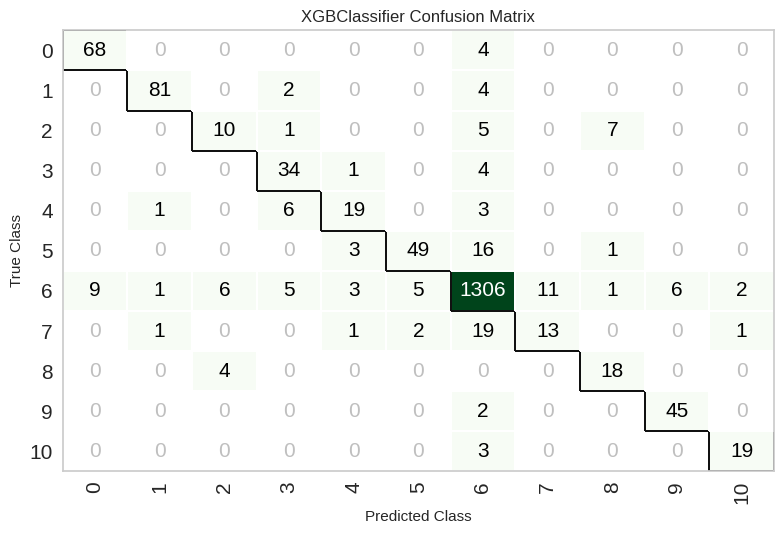

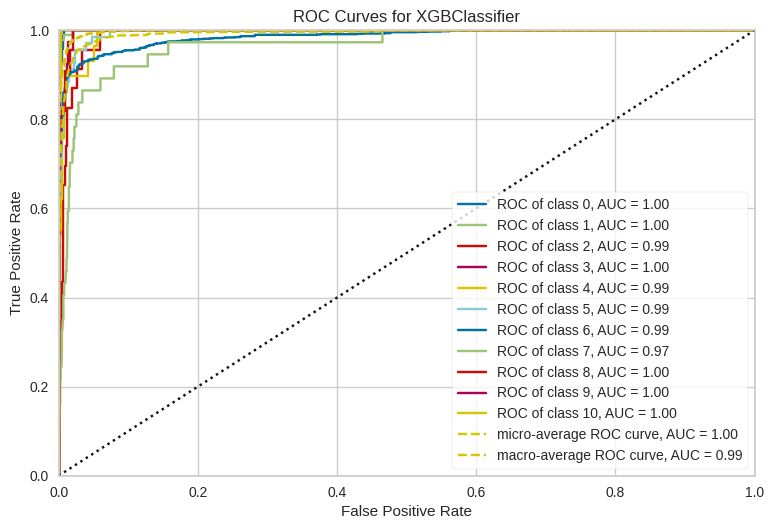

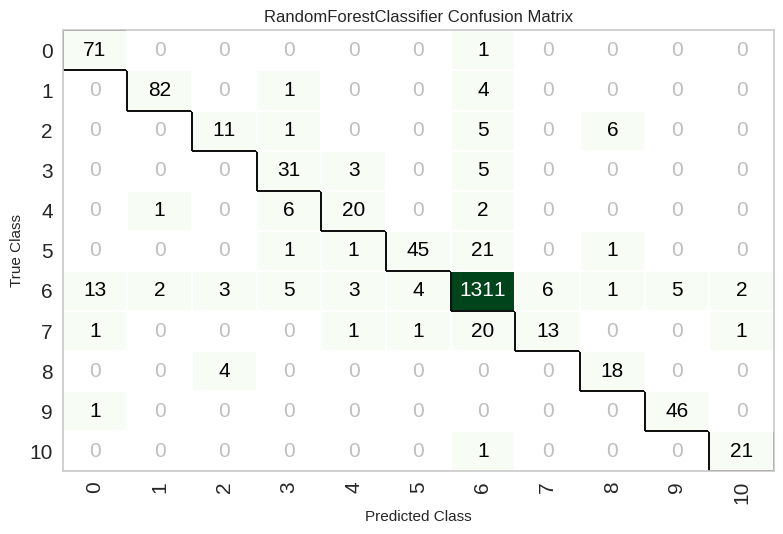

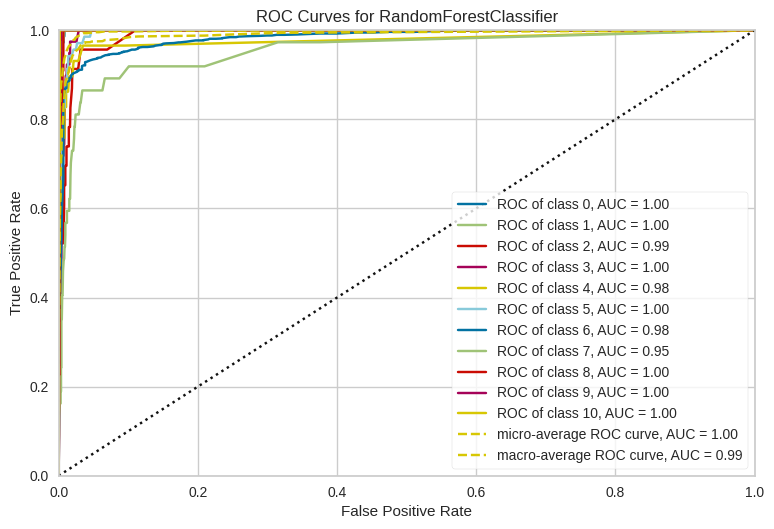

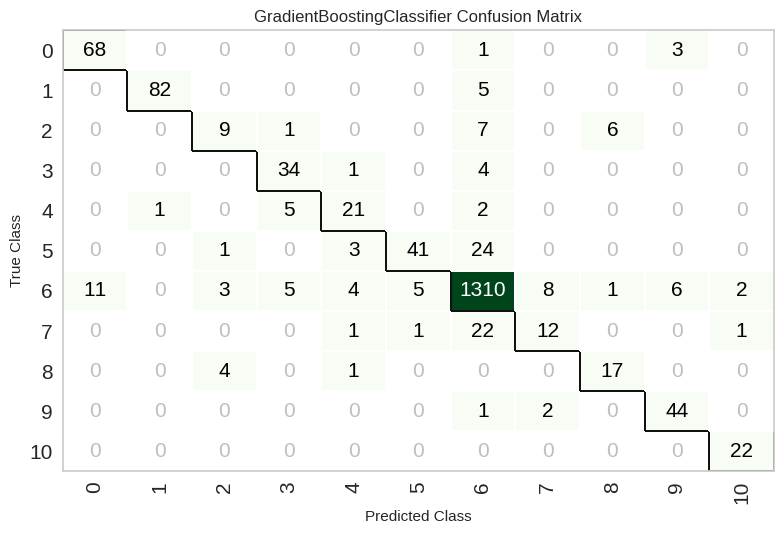

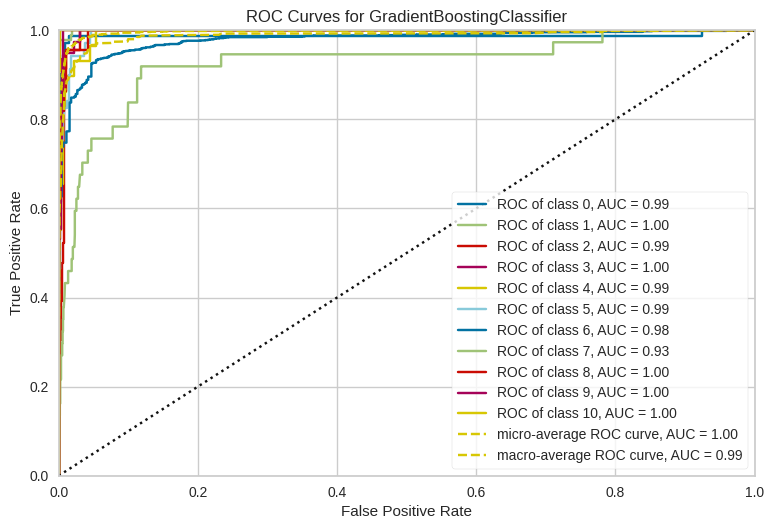

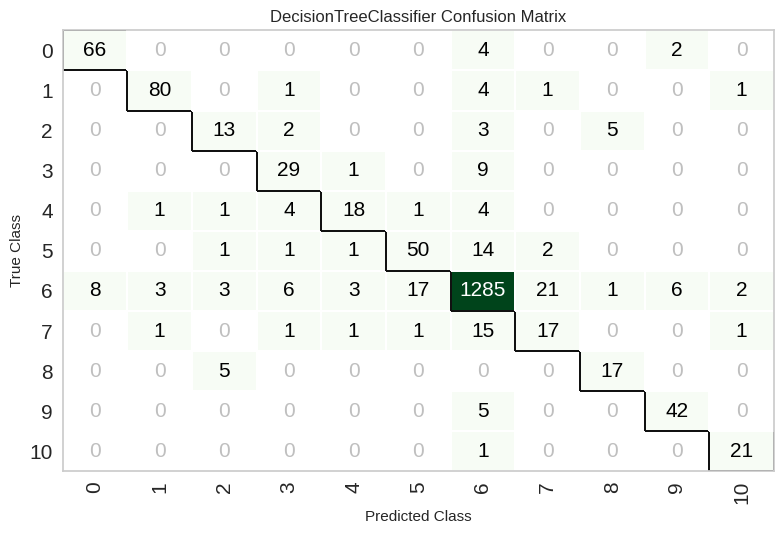

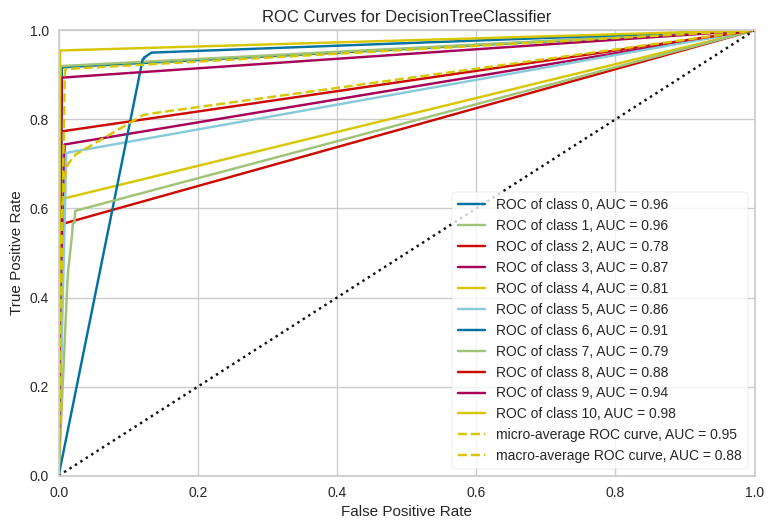

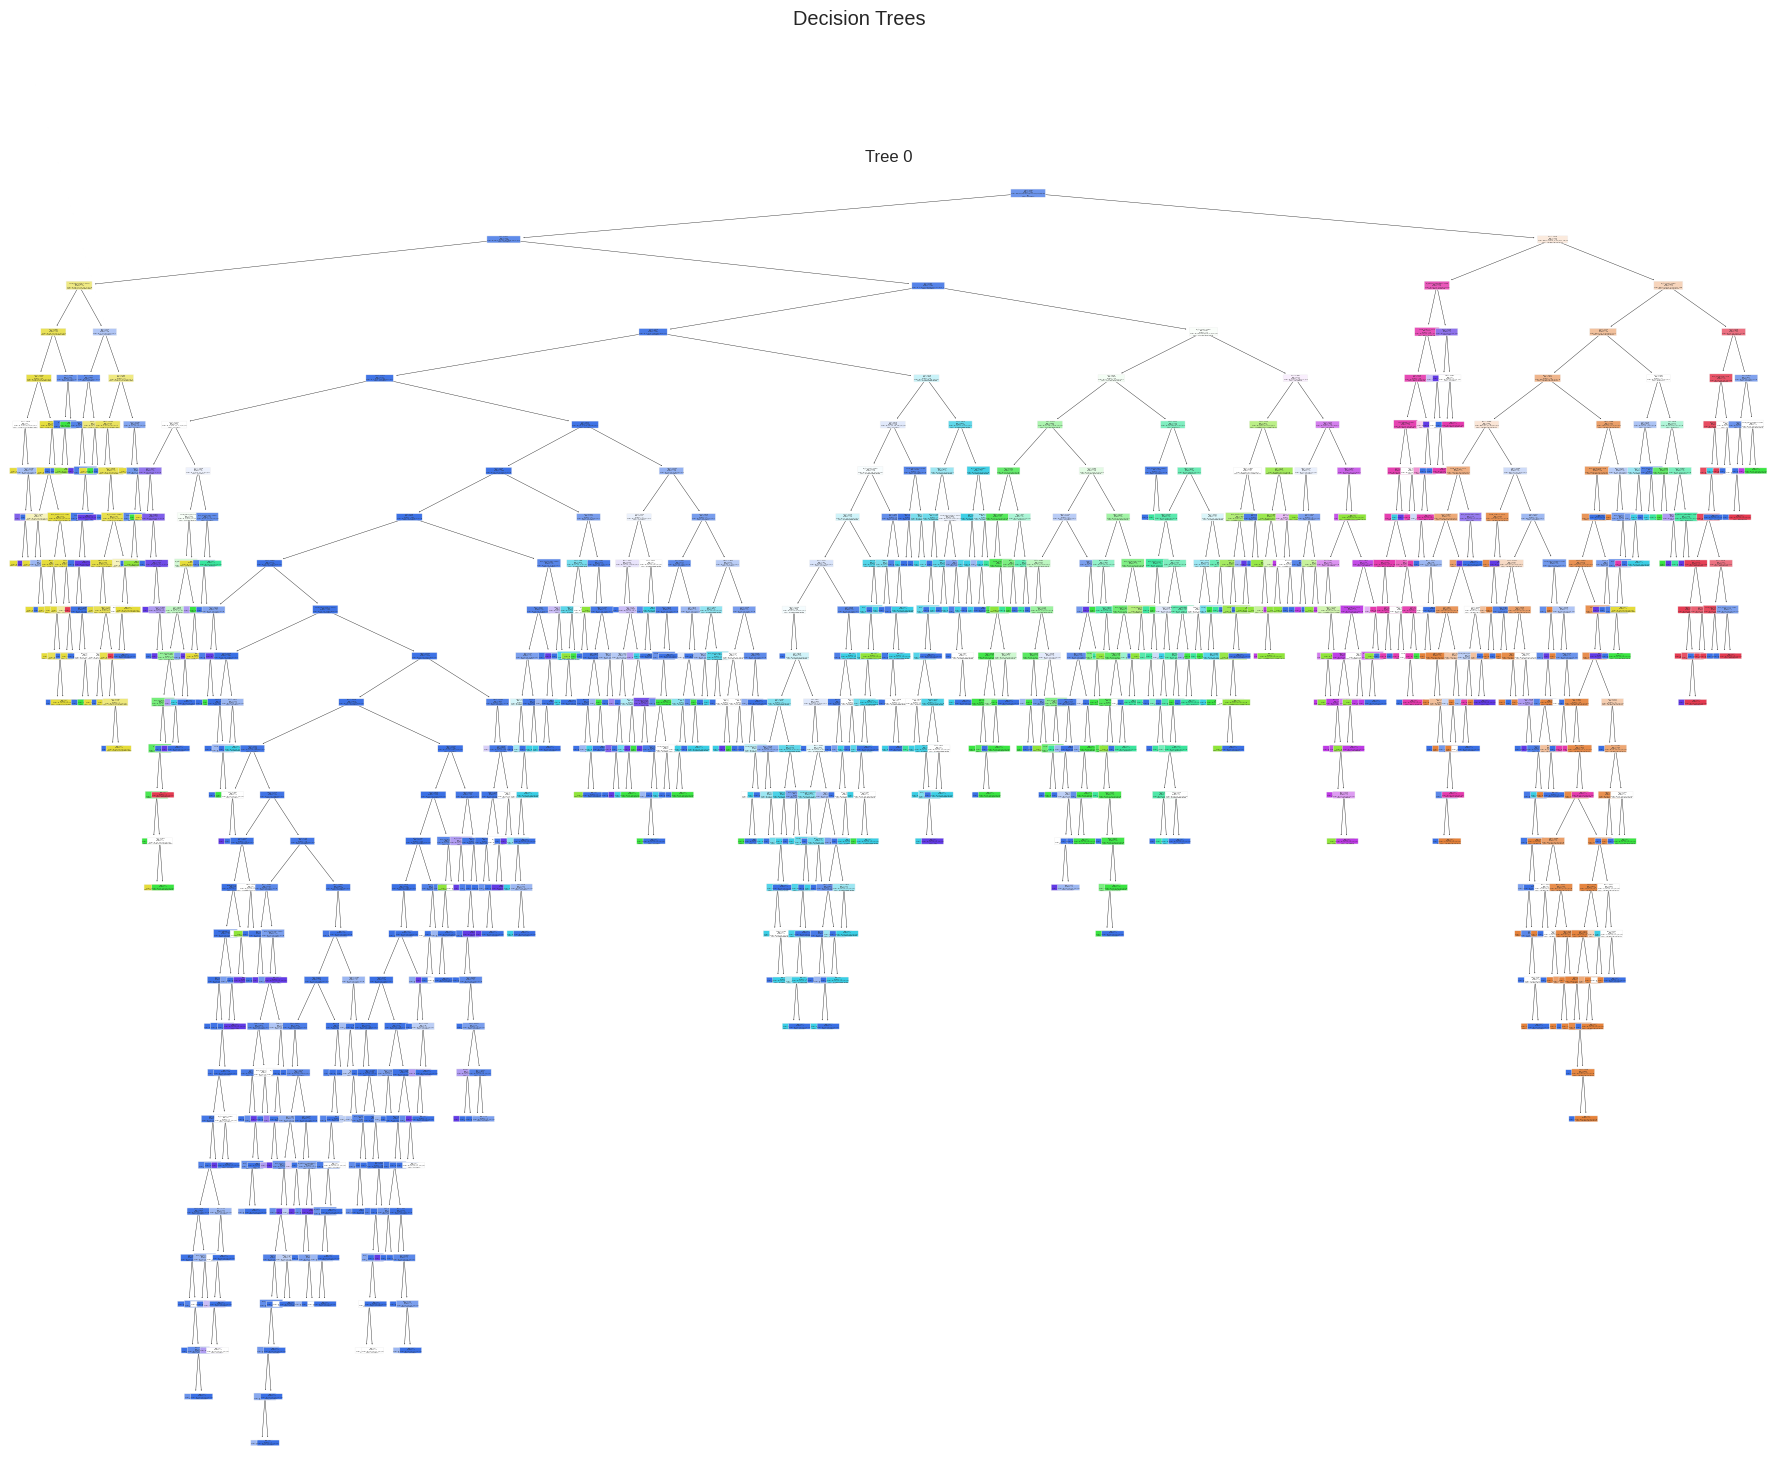

In [83]:
# ROC curve and auc value
plot_model(xgboost, plot= 'confusion_matrix')
plot_model(xgboost, plot= 'auc')
# ROC curve and auc value
plot_model(rf, plot= 'confusion_matrix')
plot_model(rf, plot= 'auc')
# ROC curve and auc value
plot_model(gbc, plot= 'confusion_matrix')
plot_model(gbc, plot= 'auc')
# ROC curve and auc value
plot_model(dt, plot= 'confusion_matrix')
plot_model(dt, plot= 'auc')
plot_model(dt, plot= 'tree')

In [119]:
# original labels of numbers

ordinal_target_vars = {}
for i, j in zip(s.y,s.y_transformed):
  ordinal_target_vars[j]=i
sorted(ordinal_target_vars.items())

[(0, 'compensated hypothyroid'),
 (1, 'concurrent non-thyroidal illness'),
 (2, 'consistent with replacement therapy'),
 (3, 'discordant assay results'),
 (4, 'hyperthyroid'),
 (5, 'increased binding protein'),
 (6, 'non-specific'),
 (7, 'other'),
 (8, 'overreplaced'),
 (9, 'primary hypothyroid'),
 (10, 'underreplaced')]

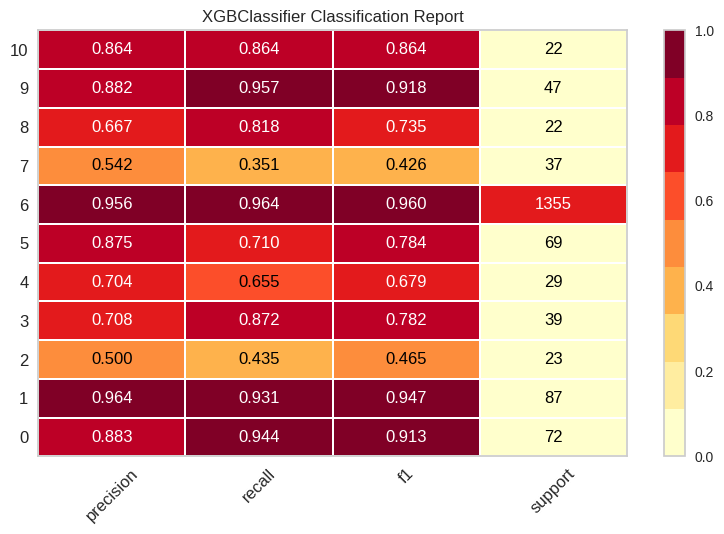

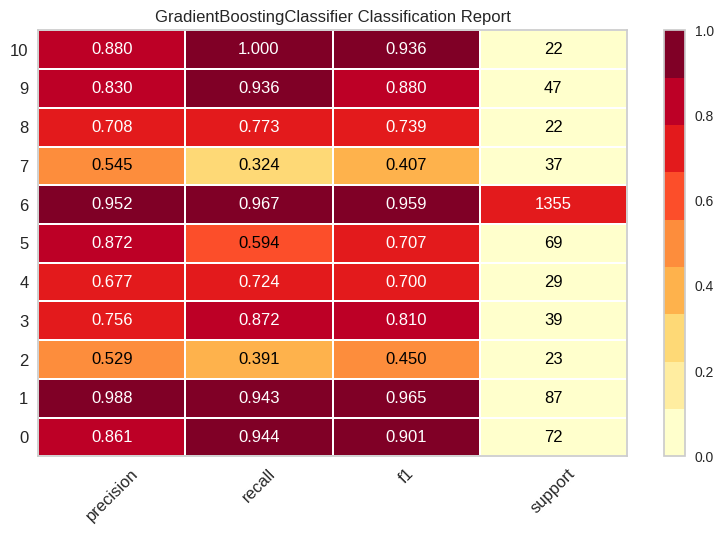

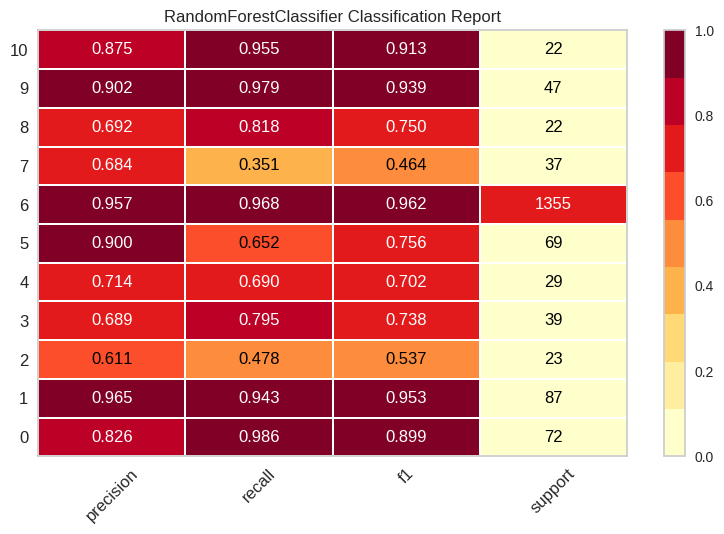

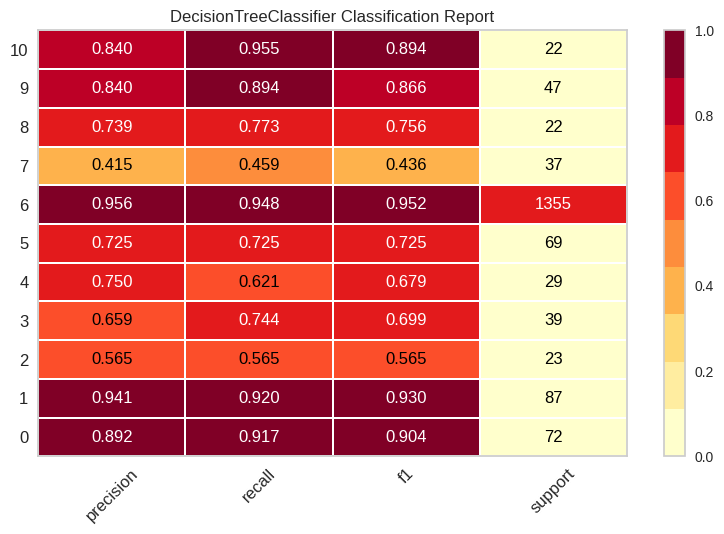

In [97]:
# Classification Report
plot_model(xgboost, plot= 'class_report')
# Classification Report
plot_model(gbc, plot= 'class_report')
# Classification Report
plot_model(rf, plot= 'class_report')
# Classification Report
plot_model(dt, plot= 'class_report')

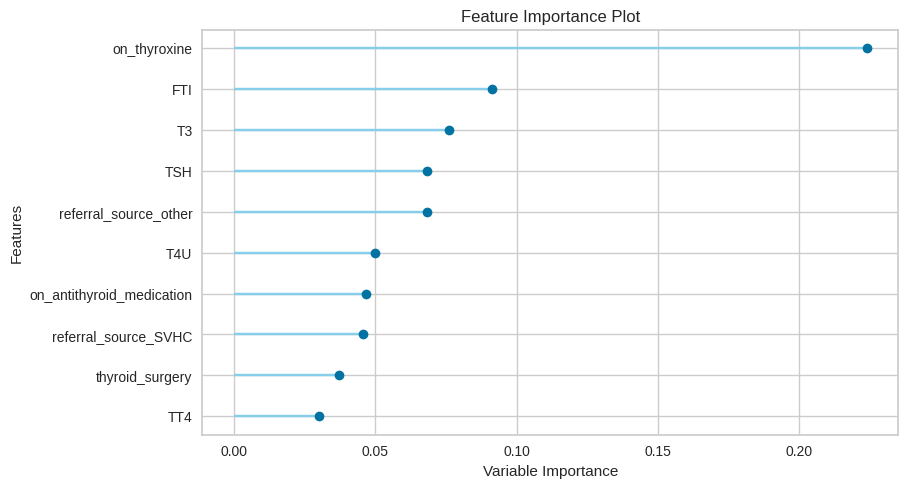

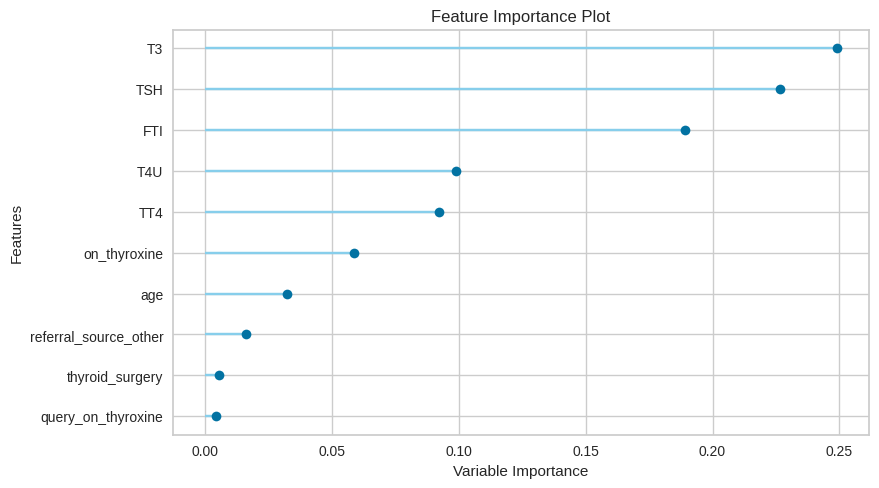

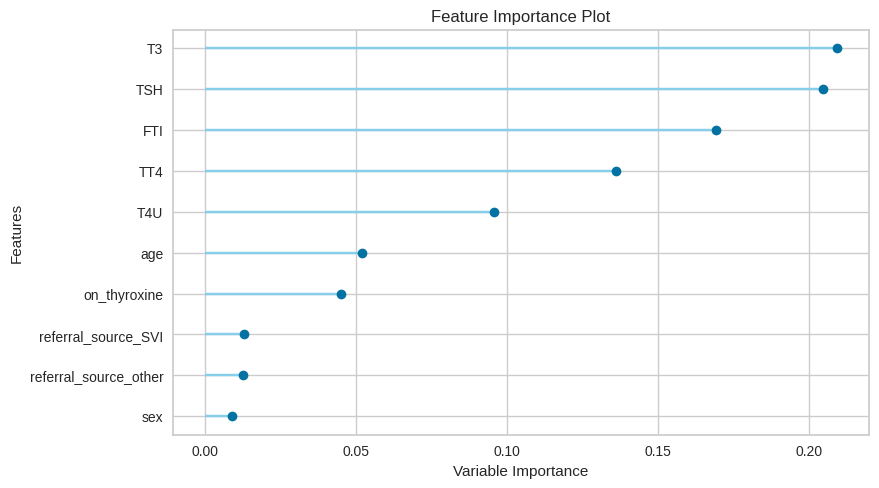

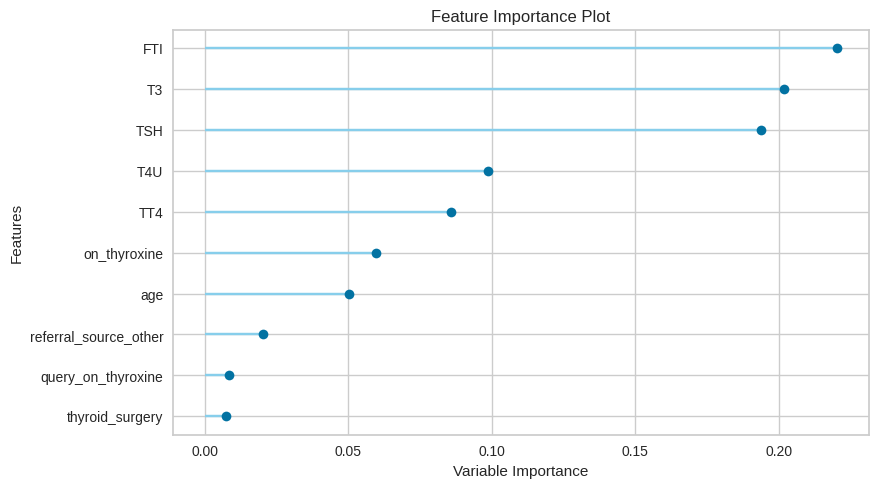

In [86]:
# Feature Importance (Top 10)
plot_model(xgboost, plot= 'feature')
plot_model(gbc, plot= 'feature')
plot_model(rf, plot= 'feature')
plot_model(dt, plot= 'feature')

In [ ]:
# Classification Report
plot_model(xgboost, plot= 'class_report')

In [121]:
# performance on test data set
predict_model(xgboost)
predict_model(rf)
predict_model(dt)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9223,0.9877,0.9223,0.9201,0.9200,0.8161,0.8164


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9262,0.9853,0.9262,0.9245,0.9229,0.8246,0.8251


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9090,0.9092,0.9090,0.9110,0.9097,0.7890,0.7891


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,TSH,T3,TT4,T4U,FTI,referral_source,disease,prediction_label,prediction_score
6911,63,M,False,False,False,False,False,False,False,False,...,False,3.20,1.7,87.0,0.75,116.0,SVHC,6,non-specific,1.0
6623,59,F,True,False,False,False,False,False,False,False,...,False,0.58,NaN,120.0,0.93,129.0,other,6,non-specific,1.0
4675,33,F,False,False,False,False,False,False,False,False,...,False,NaN,NaN,120.0,0.98,122.0,other,6,non-specific,1.0
4695,36,F,False,False,False,False,False,False,False,False,...,False,6.00,1.7,121.0,1.12,108.0,other,6,non-specific,1.0
4125,74,F,False,False,False,False,False,False,False,False,...,False,6.30,1.7,146.0,1.22,119.0,other,0,compensated hypothyroid,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,72,M,False,False,False,False,False,False,False,False,...,False,0.85,1.7,81.0,0.89,91.0,SVHC,6,non-specific,1.0
6259,38,F,False,False,False,False,False,False,False,False,...,False,7.50,NaN,76.0,0.95,80.0,other,0,compensated hypothyroid,1.0
4682,7,M,False,False,False,False,False,False,False,False,...,False,0.94,2.0,93.0,0.84,110.0,other,6,non-specific,1.0
1025,35,F,False,False,False,False,False,False,False,False,...,False,NaN,NaN,101.0,1.06,96.0,other,6,non-specific,1.0
